$$
    price_{today} = price_{yesterday}  e^{(u-1/2 \sigma^2)+\sigma[rnd(0:1)]}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.stats import norm
from pandas_datareader import data as pdr

C:\Users\yaser\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tickers = ['^GSPC']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
data = pd.DataFrame()
for t in tickers:
    data[t] = pdr.get_data_yahoo(t, start="1961-3-30", end="2024-3-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed


**log daily return**

In [3]:
log_return = np.log(data/data.shift(1))
log_return.head()

,^GSPC
Date,
1961-03-30,NaN
1961-04-03,0.008266
1961-04-04,0.000914
1961-04-05,-0.003051
1961-04-06,0.002289


In [4]:
log_return[np.isnan(log_return)] = 0
log_return.head()

,^GSPC
Date,
1961-03-30,0.000000
1961-04-03,0.008266
1961-04-04,0.000914
1961-04-05,-0.003051
1961-04-06,0.002289


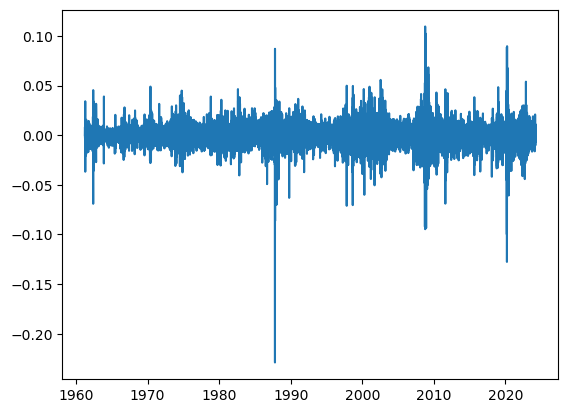

In [5]:
plt.plot(log_return)

In [6]:
## mean
u = log_return.mean()
u

^GSPC    0.000277
dtype: float64

In [7]:
## variance
var = log_return.var()
var

^GSPC    0.000108
dtype: float64

In [8]:
## standard deviation
stdev = log_return.std()
stdev

^GSPC    0.01038
dtype: float64

**drift = u - 1/2 var**

In [9]:
drift = u - 1/2 * var
drift

^GSPC    0.000223
dtype: float64

In [10]:
# z value at a given probability
norm.ppf(0.95)

1.6448536269514722

**Example to see Z value (multi-dimensional)**

In [11]:
x = np.random.rand(10,2)
x

array([[0.849295  , 0.00449099],
       [0.07442545, 0.73186858],
       [0.62010413, 0.99884144],
       [0.13472991, 0.19458215],
       [0.01209832, 0.71639821],
       [0.51101055, 0.64463351],
       [0.44328592, 0.27890738],
       [0.64023595, 0.82162449],
       [0.75136716, 0.79514269],
       [0.20533362, 0.93013159]])

In [12]:
Z = norm.ppf(x)
Z

array([[ 1.03341442, -2.61273939],
       [-1.4436022 ,  0.61847415],
       [ 0.30575427,  3.04625295],
       [-1.10430739, -0.86113392],
       [-2.25399265,  0.57217476],
       [ 0.02760285,  0.37087186],
       [-0.14264338, -0.58609041],
       [ 0.35908955,  0.92157363],
       [ 0.6787983 ,  0.82439596],
       [-0.82272001,  1.47677179]])

In [13]:
t_intervals = 1000 # forcast the price for the upcoming 1000 days 
iterations = 10 # 10 future stock predictions

$$
    returns_{daily} = e^r; r = drift + volatility
$$

In [14]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
np.shape(daily_returns)

(1000, 10)